In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from pandas_profiling import ProfileReport

In [2]:
train=pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
pf=ProfileReport(train)
pf.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
train.dropna(inplace=True)

In [7]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train['Jounery_day']=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.day

In [10]:
train['Jounery_month']=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jounery_day,Jounery_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train.drop(['Date_of_Journey'],axis =1,inplace = True)

In [13]:
train["Dep_hour"]=pd.to_datetime(train['Dep_Time']).dt.hour
train["Dep_min"]=pd.to_datetime(train['Dep_Time']).dt.minute
train.drop(['Dep_Time'],axis=1 , inplace= True)

In [14]:
train["Arrival_hour"]=pd.to_datetime(train['Arrival_Time']).dt.hour
train["Arrival_mintute"]=pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop(['Arrival_Time'],axis=1,inplace= True)

In [15]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [18]:
train["Duration_hours"] = duration_hours
train['Duration_mins'] = duration_mins

In [19]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
train.drop(["Duration"], axis = 1, inplace = True)

In [21]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

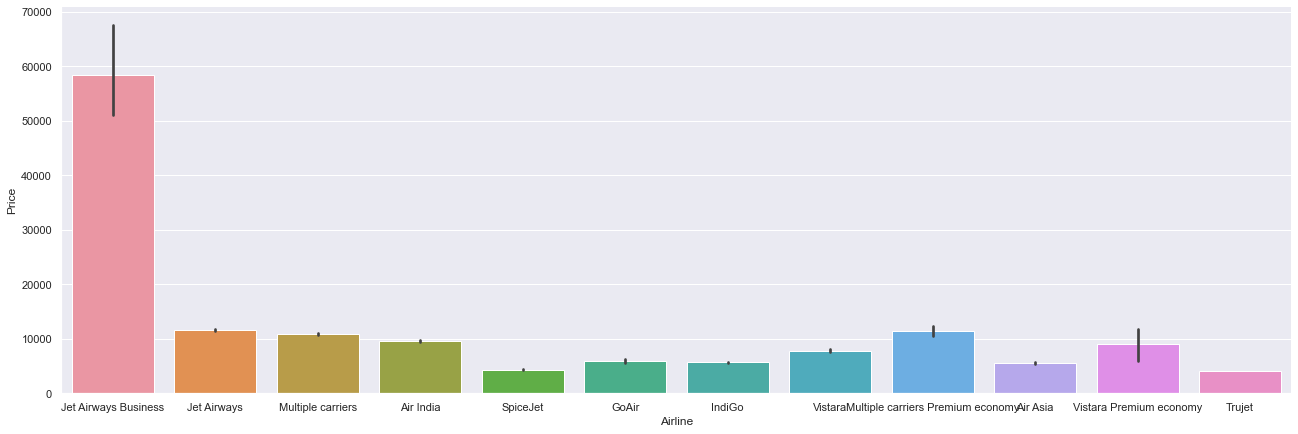

In [27]:
sns.catplot(y='Price',x='Airline',data = train.sort_values("Price", ascending = False),kind="bar",  height = 6, aspect = 3)
plt.show()

In [28]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

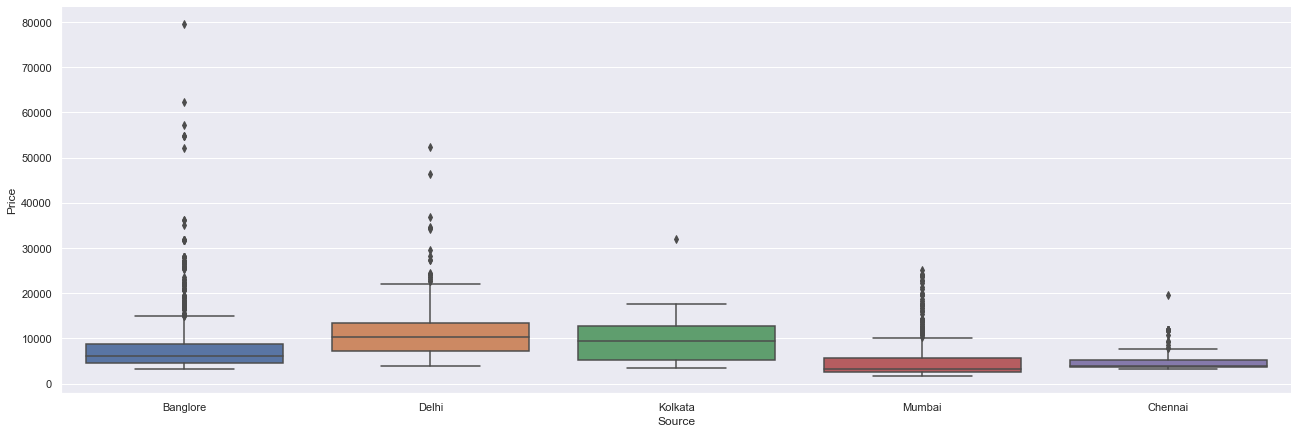

In [32]:
sns.catplot(y='Price',x='Source',data = train.sort_values("Price", ascending = False),kind="box",  height = 6, aspect = 3)
plt.show()

In [33]:
Source = train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

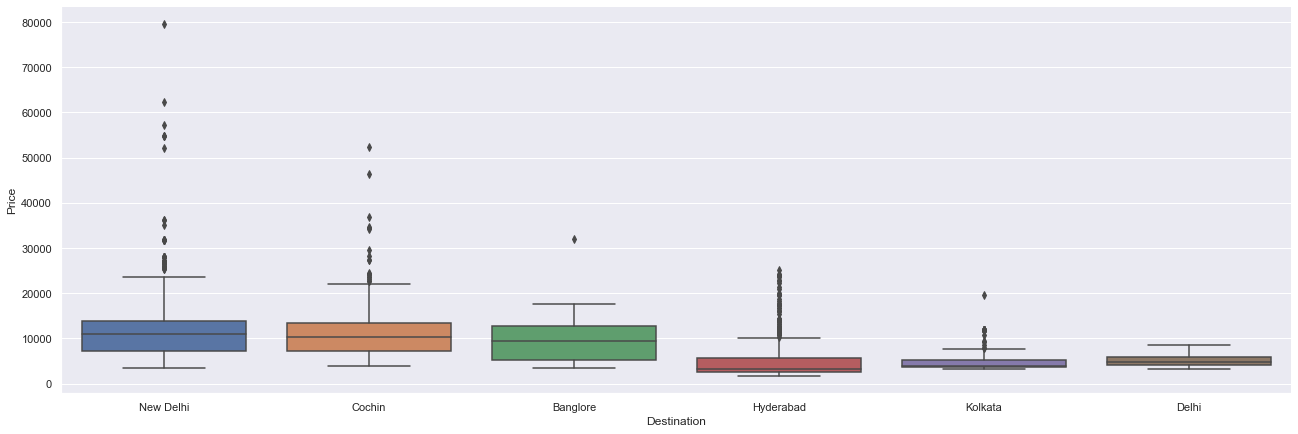

In [38]:
sns.catplot(y='Price',x='Destination',kind="box",data = train.sort_values("Price", ascending = False),height=6,aspect=3)

In [39]:
Destination = train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [41]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
train.replace({"non-stop":1,"1 stop":2,"2 stops":3,"3 stops":4,"4 stops":5},inplace=True)

In [44]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,3,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,3,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2,13302,1,3,16,50,21,35,4,45


In [45]:
df=pd.concat((train,Airline,Source,Destination),axis=1)

In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,1,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,3,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,3,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [48]:
df.head()

,Total_Stops,Price,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,3,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,3,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,2,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,2,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df.shape

(10682, 30)

In [51]:
test = pd.read_excel("Test_set.xlsx")

In [52]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
test.dropna(inplace=True)
test['Duration'].value_counts()
test.isnull().sum()
test['Jounery_day']=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.day
test['Jounery_month']=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.month
test.drop(['Date_of_Journey'],axis =1,inplace = True)
test["Dep_hour"]=pd.to_datetime(test['Dep_Time']).dt.hour
test["Dep_min"]=pd.to_datetime(test['Dep_Time']).dt.minute
test.drop(['Dep_Time'],axis=1 , inplace= True)
test["Arrival_hour"]=pd.to_datetime(test['Arrival_Time']).dt.hour
test["Arrival_mintute"]=pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop(['Arrival_Time'],axis=1,inplace= True)
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [54]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    

In [55]:
test["Duration_hours"] = duration_hours
test['Duration_mins'] = duration_mins

In [56]:
test.drop(["Duration"], axis = 1, inplace = True)

In [57]:
Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Source = test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)


In [58]:
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test.replace({"non-stop":1,"1 stop":2,"2 stops":3,"3 stops":4,"4 stops":5},inplace=True)
df1=pd.concat((test,Airline,Source,Destination),axis=1)
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df1.shape

(2671, 28)

In [59]:
df1.head()

,Total_Stops,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,2,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,2,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df.shape

(10682, 30)

In [63]:
x=df.drop(['Price'],axis=1)

In [64]:
x.head()

,Total_Stops,Jounery_day,Jounery_month,Dep_hour,Dep_min,Arrival_hour,Arrival_mintute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,3,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,2,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y=df.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

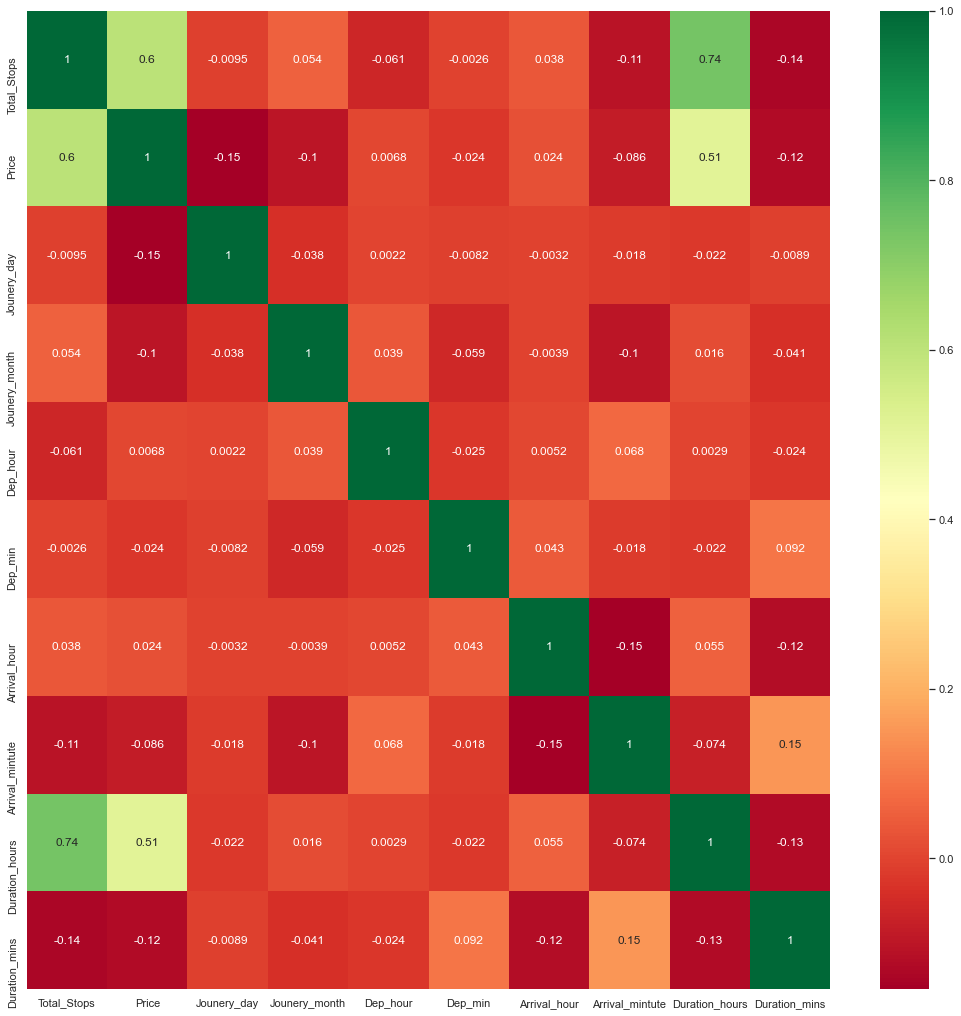

In [68]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[2.43233064e-01 1.43818861e-01 5.34330762e-02 2.49109260e-02
 2.09978861e-02 2.79557531e-02 1.92937876e-02 9.80036853e-02
 1.77687991e-02 1.10378181e-02 1.58619749e-03 1.65154126e-02
 1.42936970e-01 6.75603029e-02 2.01705295e-02 8.57092711e-04
 2.85342531e-03 1.16534643e-04 5.62229880e-03 8.40780571e-05
 4.76020426e-04 1.05175404e-02 3.17776688e-03 6.72944946e-03
 1.15053415e-02 1.56511453e-02 7.79684749e-03 5.58096403e-04
 2.48312931e-02]


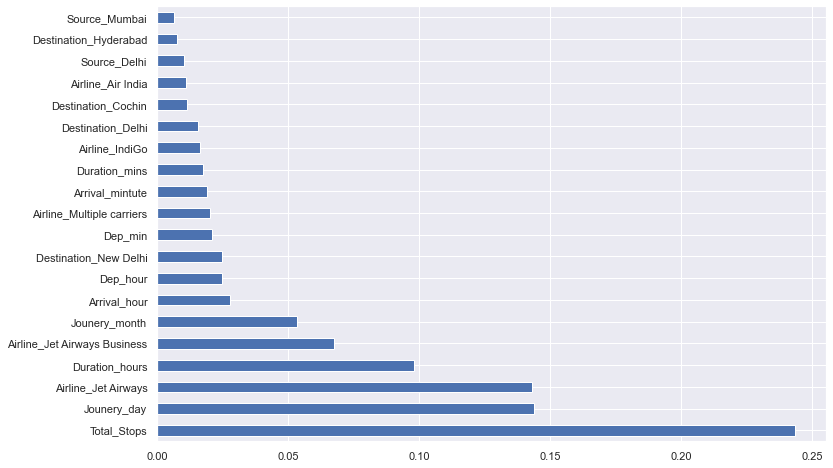

In [72]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)


0.9531867046217143

In [89]:
reg_rf.score(X_test, y_test)

0.7960194709342819

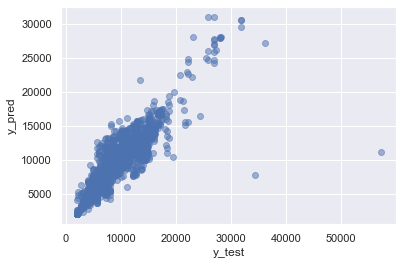

In [75]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1180.1269793020113
MSE: 4398239.656747334
RMSE: 2097.1980490042743


In [77]:
metrics.r2_score(y_test, y_pred)

0.7960194709342819

In [78]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [80]:
prediction = rf_random.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.615506286036
MSE: 4055698.6622224594
RMSE: 2013.8765260617295


In [90]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)


In [91]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


In [92]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.811905756981176